Random Forest<br>
COM20 - Avgustin Chynarbekov<br>
AI Final Exam

About the data: Let’s consider a Company dataset with around 10 variables and 400 records.

The attributes are as follows:

<ol>
<li>Sales -- Unit sales (in thousands) at each location Competitor</li>
<li>Price -- Price charged by competitor at each location </li>
<li>Income -- Community income level (in thousands of dollars) </li>
<li>Advertising -- Local advertising budget for company at each location (in thousands of dollars) </li>
<li>Population -- Population size in region (in thousands)</li>
<li>Price -- Price company charges for car seats at each site </li>
<li>Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
</li>
<li>Age -- Average age of the local population</li>
<li>Education -- Education level at each location </li>
<li>Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location </li>
<li>US -- A factor with levels No and Yes to indicate whether the store is in the US or not </li>
</ol>

Problem Statement:

A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A Random Forest can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.
Let's get started

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [2]:
import pandas as pd
features = pd.read_csv('generated_data.csv')
features.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,7.9,118,16,3,107,163,Medium,60,12,Yes,No
1,22.2,164,73,15,321,117,Medium,44,14,Yes,No
2,20.2,138,22,3,437,57,Good,60,9,Yes,Yes
3,14.2,180,12,3,138,197,Good,52,8,Yes,Yes
4,10.4,115,31,6,141,76,Medium,32,9,No,Yes


In [3]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
print('The shape of our features is:', features.shape)

The shape of our features is: (400, 11)


In [5]:
features.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

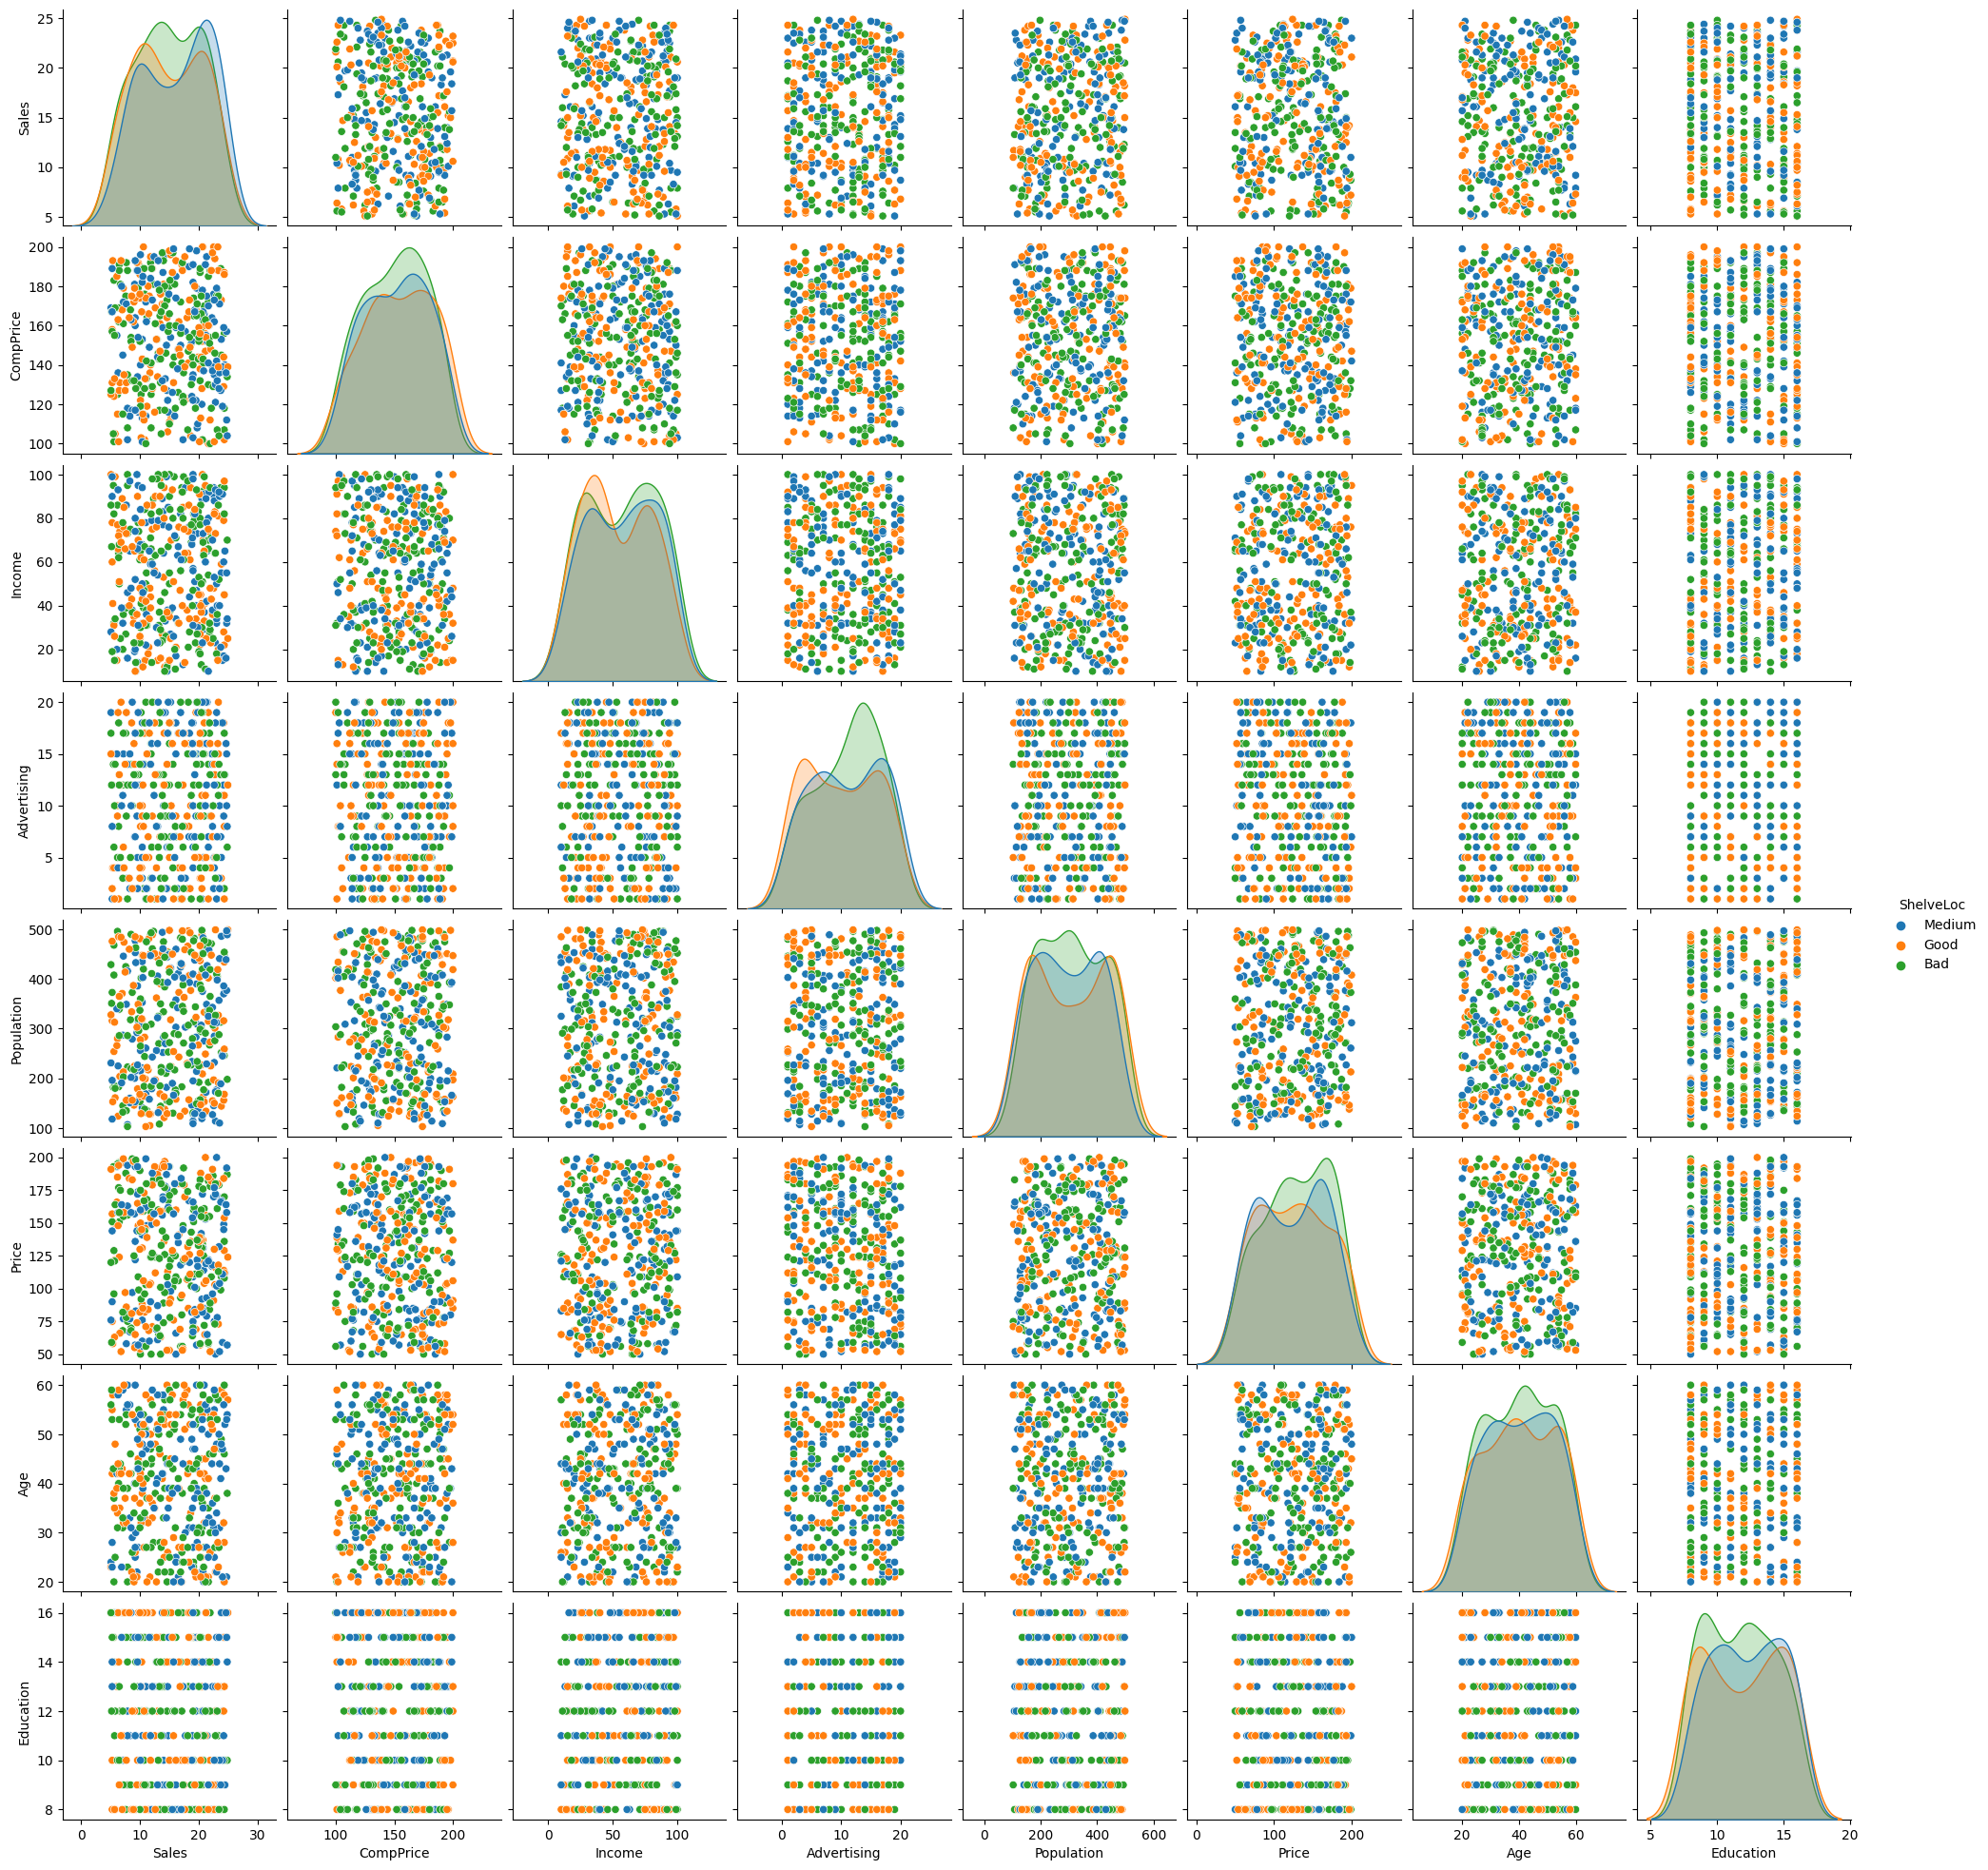

In [6]:
sns.pairplot(data=features, hue = 'ShelveLoc')

In [7]:
df=pd.get_dummies(features,columns=['Urban','US'], drop_first=True)

In [8]:
print(df.head())

   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age   
0    7.9        118      16            3         107    163    Medium   60  \
1   22.2        164      73           15         321    117    Medium   44   
2   20.2        138      22            3         437     57      Good   60   
3   14.2        180      12            3         138    197      Good   52   
4   10.4        115      31            6         141     76    Medium   32   

   Education  Urban_Yes  US_Yes  
0         12       True   False  
1         14       True   False  
2          9       True    True  
3          8       True    True  
4          9      False    True  


In [9]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [10]:
df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [11]:
print(df.head())

   Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age   
0    7.9        118      16            3         107    163          2   60  \
1   22.2        164      73           15         321    117          2   44   
2   20.2        138      22            3         437     57          1   60   
3   14.2        180      12            3         138    197          1   52   
4   10.4        115      31            6         141     76          2   32   

   Education  Urban_Yes  US_Yes  
0         12       True   False  
1         14       True   False  
2          9       True    True  
3          8       True    True  
4          9      False    True  


In [12]:
x=df.iloc[:,0:6]
y=df['ShelveLoc']
x

,Sales,CompPrice,Income,Advertising,Population,Price
0,7.9,118,16,3,107,163
1,22.2,164,73,15,321,117
2,20.2,138,22,3,437,57
3,14.2,180,12,3,138,197
4,10.4,115,31,6,141,76
...,...,...,...,...,...,...
395,15.7,199,26,7,166,157
396,8.7,149,67,2,156,183
397,11.6,149,65,18,158,60
398,22.6,173,53,12,313,177


In [13]:
y

0      2
1      2
2      1
3      1
4      2
      ..
395    2
396    1
397    2
398    2
399    3
Name: ShelveLoc, Length: 400, dtype: int64

In [14]:
df['ShelveLoc'].unique()

array([2, 1, 3], dtype=int64)

In [15]:
df.ShelveLoc.value_counts()

ShelveLoc
3    142
2    129
1    129
Name: count, dtype: int64

In [16]:
colnames = list(df.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']

In [17]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000
mean,15.285250,151.987500,55.852500,10.705000,304.135000,126.01750,2.032500,40.262500,11.937500
std,5.707319,27.543219,26.572089,5.831208,119.197512,43.52002,0.823492,12.017472,2.709603
min,5.100000,100.000000,10.000000,1.000000,103.000000,50.00000,1.000000,20.000000,8.000000
25%,10.400000,130.000000,32.000000,5.000000,195.750000,85.00000,1.000000,30.750000,9.000000
50%,15.150000,154.000000,56.000000,11.000000,305.500000,126.50000,2.000000,41.000000,12.000000
75%,20.425000,175.000000,79.000000,16.000000,411.500000,162.00000,3.000000,51.000000,14.000000
max,24.900000,200.000000,100.000000,20.000000,499.000000,200.00000,3.000000,60.000000,16.000000


In [18]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,7.9,118,16,3,107,163,2,60,12,True,False
1,22.2,164,73,15,321,117,2,44,14,True,False
2,20.2,138,22,3,437,57,1,60,9,True,True
3,14.2,180,12,3,138,197,1,52,8,True,True
4,10.4,115,31,6,141,76,2,32,9,False,True


In [19]:
labels = np.array(df['Income'])
features= df.drop('Income', axis = 1)
feature_list = list(df.columns)
features = np.array(df)

In [20]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [21]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (300, 11)
Training Labels Shape: (300,)
Testing Features Shape: (100, 11)
Testing Labels Shape: (100,)


In [22]:
baseline_preds = test_features[:, feature_list.index('Sales')]
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  39.33


In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels);

In [24]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.27 degrees.


In [25]:
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.19 %.


In [26]:
from sklearn.tree import export_graphviz
import pydot
tree = rf.estimators_[5]
from sklearn.tree import export_graphviz
import pydot
tree = rf.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

In [27]:
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
tree_small = rf_small.estimators_[5]
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [28]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Income               Importance: 1.0
Variable: Sales                Importance: 0.0
Variable: CompPrice            Importance: 0.0
Variable: Advertising          Importance: 0.0
Variable: Population           Importance: 0.0
Variable: Price                Importance: 0.0
Variable: ShelveLoc            Importance: 0.0
Variable: Age                  Importance: 0.0
Variable: Education            Importance: 0.0
Variable: Urban_Yes            Importance: 0.0
Variable: US_Yes               Importance: 0.0


In [29]:
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
important_indices = [feature_list.index('Sales'), feature_list.index('Income')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
rf_most_important.fit(train_important, train_labels)
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.2 degrees.
Accuracy: 99.32 %.


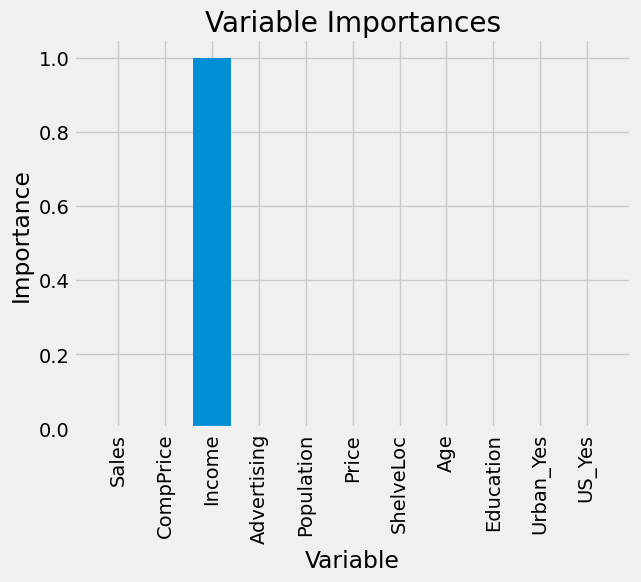

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');